### imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Questions to answer

##### Analysis
1. What is the avarage salary for specific Data Scientist job?
2. Which company pays the most?
3. Which company has the highest rating?
4. How does the year affect the techonlogies used?
5. In which DS sector employees earn the most?
6. How does the location of a job affect salary? How deos size of a company affect it?
--------------------------
##### ML stuff
Can we predict how high the salary will be for provided data?

---------------------------------

### Code (analysis)

In [2]:
data_path = '../data/data_cleaned_2021.csv'
dfa = pd.read_csv(data_path)

In [3]:
dfa.head()

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na


In [4]:
dfa.drop('index', axis=1, inplace=True) # for analysis we already have an index.

In [5]:
dfa.drop_duplicates(inplace=True) # there are many dups

In [6]:
dfa = dfa.rename(columns={'Avg Salary(K)': 'avg_salaryk'})
dfa.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer provided', 'Lower Salary', 'Upper Salary',
       'avg_salaryk', 'company_txt', 'Job Location', 'Age', 'Python', 'spark',
       'aws', 'excel', 'sql', 'sas', 'keras', 'pytorch', 'scikit', 'tensor',
       'hadoop', 'tableau', 'bi', 'flink', 'mongo', 'google_an',
       'job_title_sim', 'seniority_by_title', 'Degree'],
      dtype='object')

In [7]:
dfa.loc[:, dfa.isin(['na']).any()] # na stands for nan?

,job_title_sim,seniority_by_title,Degree
0,data scientist,na,M
1,data scientist,na,M
2,data scientist,na,M
3,data scientist,na,na
4,data scientist,na,na
...,...,...,...
695,data modeler,na,M
700,data scientist,na,na
716,other scientist,sr,M
732,machine learning engineer,na,na


In [8]:
dfa.drop('seniority_by_title',axis=1, inplace=True)

In [9]:
dfa.loc[dfa.Degree == 'na'] # na stands for nan? Which means that employee does not have a degree?
# or that he did not provide it with information

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,Degree
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,Government,...,0,0,0,0,0,0,0,0,data scientist,na
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,Company - Private,...,0,0,0,0,0,0,0,0,data scientist,na
5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 - 500,2000,Company - Public,...,0,0,0,0,1,0,1,0,data scientist,na
6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 - 1000,2008,Company - Private,...,0,0,0,0,0,0,0,0,data scientist,na
9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 - 200,2009,Company - Private,...,0,0,0,0,0,0,0,0,data scientist,na
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
656,Data Scientist,$87K-$141K (Glassdoor est.),We’re looking for a data scientist to drive ou...,3.6,TRANZACT\n3.6,"Fort Lee, NJ","Fort Lee, NJ",1001 - 5000,1989,Company - Private,...,0,0,1,1,1,0,0,0,data scientist,na
685,Data Scientist,$51K-$88K (Glassdoor est.),Job Description Header 2 Data scientist Locati...,4.3,Solugenix Corporation\n4.3,"Phoenix, AZ","Brea, CA",201 - 500,1969,Company - Private,...,1,0,0,0,0,0,0,0,data scientist,na
692,Jr. Data Scientist,$81K-$132K (Glassdoor est.),MITRE\nis a trusted operator of federally fund...,3.2,MITRE\n3.2,"McLean, VA","Bedford, MA",5001 - 10000,1958,Nonprofit Organization,...,0,0,1,1,0,0,0,0,data scientist,na
700,Data Scientist,$65K-$113K (Glassdoor est.),DatamanUSA has an exciting opportunity for a D...,3.4,"DatamanUSA, LLC\n3.4","Olympia, WA","Centennial, CO",51 - 200,-1,Company - Private,...,0,0,0,0,0,0,0,0,data scientist,na


In [10]:
dfa.loc[dfa.job_title_sim == 'na'] # in this case na problably stands for something that was hard to categorize, so we can drop it

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,Degree
89,Data Management Specialist,$31K-$65K (Glassdoor est.),"Location: Huntsville, AL\n\nClearance: Secret ...",4.5,NMR Consulting\n4.5,"Huntsville, AL","Chantilly, VA",51 - 200,1996,Company - Private,...,0,0,1,0,0,0,0,0,na,na
191,Software Engineer - Data Visualization,$60K-$127K (Glassdoor est.),Join ClearEdge and be a part of the team of me...,4.0,ClearEdge\n4.0,"Annapolis Junction, MD","Annapolis Junction, MD",51 - 200,2002,Company - Private,...,0,0,0,0,0,0,0,0,na,M
300,Data Operations Lead,Employer Provided Salary:$85K-$90K,Data Operations Lead\nLocation: Flexible thoug...,-1.0,Muso,"San Francisco, CA","San Francisco, CA",201 - 500,-1,Nonprofit Organization,...,0,0,0,1,0,0,0,0,na,M
374,"Enterprise Architect, Data",$101K-$158K (Glassdoor est.),The MassMutual Data Science team in the Enterp...,3.6,MassMutual\n3.6,"Boston, MA","Springfield, MA",5001 - 10000,1851,Company - Private,...,0,0,1,1,1,0,0,0,na,na
388,"Technology-Minded, Data Professional Opportuni...",$40K-$101K (Glassdoor est.),"At VU, we help Veterans buy homes. To make tha...",4.7,Veterans United Home Loans\n4.7,"Columbia, MO","Columbia, MO",1001 - 5000,2002,Company - Private,...,0,0,1,1,0,0,1,0,na,na
643,"Senior Engineer, Data Management Engineering",$68K-$129K (Glassdoor est.),Western Digital®\n\n\nThe next big thing in da...,3.5,Western Digital\n3.5,"Milpitas, CA","San Jose, CA",10000+,1970,Company - Public,...,0,0,1,0,0,0,0,0,na,na


In [11]:
dfa.drop(dfa.loc[dfa.job_title_sim == 'na'].index, inplace=True)

In [12]:
by_jobtit = dfa.groupby('job_title_sim')
dfa['avg_salaryk']

0       72.0
1       87.5
2       85.0
3       76.5
4      114.5
       ...  
695     86.5
700     89.0
716     92.0
732    111.0
735     87.5
Name: avg_salaryk, Length: 461, dtype: float64

In [13]:
mean_salary = by_jobtit['avg_salaryk'].mean() # the average of the averages, because the salary is given as a range.
mean_salary.rename({'Data scientist project manager':'project manager'},inplace=True)
mean_salary.drop('other scientist', inplace=True)
mean_salary = mean_salary.round(decimals=2) 

Text(0, 0.5, 'average salaray in k$')

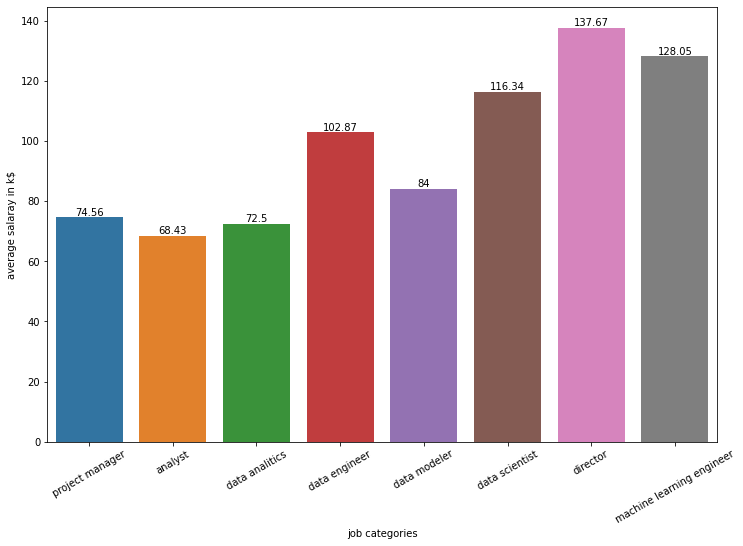

In [14]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x = mean_salary.index, y = mean_salary.values)
ax.bar_label(ax.containers[0])
plt.xlabel('job categories')
plt.xticks(rotation=30)
plt.ylabel('average salary in k$')

Ans 1. The most payed data scientist related job categories are:
- directors related with DS - 137k average
- machine learning enginners - 128k average
- pure data scientist - 116k average
- data engineers - 102k average